In [1]:
# 2024-04
# musical tunings visualized with log-scaled bars

In [3]:
import xml.etree.ElementTree as ET
from IPython.display import SVG, display

import numpy as np

import matplotlib.pyplot as plt

In [4]:
import colour

[ 0.95638578  0.78348894  0.99823294] [ 0.02175557  0.54194503  0.25827363]


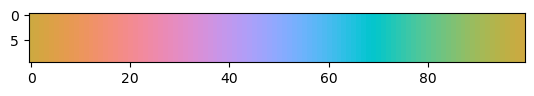

In [5]:
theta = np.linspace(0, 2*np.pi, 100)
a = 0.127 * np.sin(theta)
b = 0.127 * np.cos(theta)
L = 0.75
oklabs = np.zeros([100, 3])
oklabs[:, 0] = L
oklabs[:, 1] = a
oklabs[:, 2] = b

xyz = (colour.Oklab_to_XYZ(oklabs))
rgb = colour.XYZ_to_sRGB(xyz)
print(np.max(rgb, axis=0), np.min(rgb, axis=0))

img = np.zeros([10, 100, 3])
for i in range(10):
    img[i] = rgb

plt.imshow(img)

In [6]:
def okhue(theta):
    L = 0.75
    a = 0.127 * np.sin(theta)
    b = 0.127 * np.cos(theta)

    rgb = colour.XYZ_to_sRGB(colour.Oklab_to_XYZ([L, a, b]))

    return rgb * 256

In [7]:
print(*okhue(3))

156.150551459 165.805613688 254.168499343


In [8]:
def make_color(r, g, b):
    r, g, b = (int(x) % 256 for x in (r, g, b))
    return f'#{r:02x}{g:02x}{b:02x}'

def get_color(l):
        PRIMES = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67]
        COLORS = {p: make_color(*okhue(1.35 * i - 1)) for i, p in enumerate(PRIMES)}

        if l in COLORS:
            return COLORS[l]

        return "white"
    
        #return make_color(*okhue(3 * np.sqrt(l)))

class Diagram:
    def __init__(self):
        self.rows = []

    def add_row(self, lengths):
        self.rows.append(lengths)
    
    def render(self):
        xscale=50
        yscale=20
        
        svg = ET.Element('svg', version='1.1', xmlns='http://www.w3.org/2000/svg')
        
        totwidth = 0
        for i, row in enumerate(self.rows):
            x = 0
            for length in row:
                width = xscale * np.log(length)
                y = yscale * i
                ET.SubElement(svg, 'rect', 
                              x=str(x), y=str(y), width=str(width), height=str(yscale), 
                              fill=get_color(length), stroke='black')
                x += width
                totwidth = max(x, totwidth)

        svg.set('width', str(int(totwidth + 2)))

        return SVG(ET.tostring(svg, encoding='unicode'))

In [14]:
diag = Diagram()
diag.add_row([2, 3, 5, 7, 11])
diag.add_row([13, 17, 19])
diag.add_row([23, 29, 31])
diag.add_row([37, 41, 43])
display(diag.render())

diag = Diagram()
diag.add_row([5] * 3)
diag.add_row([2] * 19)
diag.add_row([3] * 12)
display(diag.render())

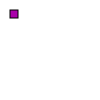

In [56]:

# Create the SVG element
svg = ET.Element('svg', width='100', height='100', version='1.1', xmlns='http://www.w3.org/2000/svg')

# Create a rectangle
rect = ET.SubElement(svg, 'rect', x='10', y='10', width='8', height='8', fill='#aa00AA', stroke="black")

# Use ET.tostring to convert to string and decode from bytes
svg_string = ET.tostring(svg, encoding='unicode')


# Render the SVG
display(SVG(svg_string))

In [46]:
[x for x in svg]

[<Element 'rect' at 0x75124c66b600>]